In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.ticker as mtick

cm = 1/2.54

In [2]:
x = [15000,10000,5000,2000,1000,500]
y_test  = np.array([0.37, 0.50,0.67, 1.16,1.90,2.92])/100
# y_train = np.array([0.280,0.44,0.557,0.778,1.08,1.51])/100

z  = np.array([136,94,51,29,20,16])

In [3]:
plt.rcParams['font.family']       = 'arial' # 'Times New Roman' #
# plt.rcParams['axes.linewidth']    = 1
plt.rcParams['xtick.major.size']  = 2.
plt.rcParams['ytick.major.size']  = 2.5
plt.rcParams['xtick.minor.size']  = 1.5
plt.rcParams['ytick.minor.size']  = 1.5
plt.rcParams['xtick.major.width'] = 0.5
plt.rcParams['ytick.major.width'] = 0.5
plt.rcParams['xtick.minor.width'] = 0.5
plt.rcParams['ytick.minor.width'] = 0.5
plt.rcParams['lines.linewidth']   = 1.5
plt.rcParams['lines.markersize']  = 3.5

plt.rcParams['font.size']    = 10
# plt.rcParams['figure.titlesize'] = 2

plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['axes.labelsize']  = 10
plt.rcParams['axes.titlesize'] = 8
# plt.rcParams['legend.fontsize'] = 8
# plt.rcParams['legend.title_fontsize'] = 8

plt.rcParams["savefig.bbox"] = 'tight'
plt.rcParams["savefig.pad_inches"] = 0.1
plt.rcParams['image.cmap'] = 'jet_r'
plt.rcParams['figure.dpi'] = 150

In [4]:
class MathTextSciFormatter(mticker.Formatter):
    def __init__(self, fmt="%1.0e"):
        self.fmt = fmt
    def __call__(self, x, pos=None):
        s = self.fmt % x
        decimal_point = '.'
        positive_sign = '+'
        tup = s.split('e')
        significand = tup[0].rstrip(decimal_point)
        sign = tup[1][0].replace(positive_sign, '')
        exponent = tup[1][1:].lstrip('0')
        if exponent:
            exponent = '10^{%s%s}' % (sign, exponent)
        if significand and exponent:
            s =  r'%s{\times}%s' % (significand, exponent)
        else:
            s =  r'%s%s' % (significand, exponent)
        return "${}$".format(s)

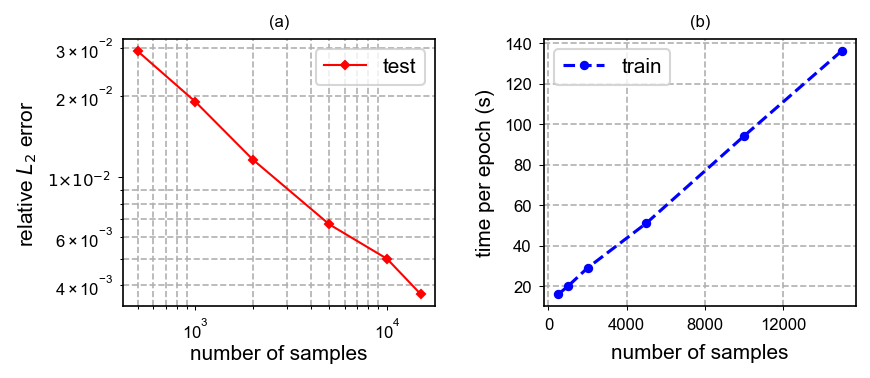

In [7]:
title = ['(a)', '(b)']
fig = plt.figure(figsize=(16*cm,6*cm))
ax = plt.subplot(121)
# ax.plot(x, y_train, color='b', linestyle='dashed', linewidth=1, marker='D',markersize=3,label='train')
ax.plot(x,  y_test, color='r', linestyle='solid',  linewidth=1, marker='D',markersize=3,label='test')

ax.set_yscale("log")
ax.set_xscale("log")
# ax.set_xticks(np.arange(0, 16000, 4000))
# ax.tick_params(axis='both',which='both',direction='in')
ax.set_xlabel("number of samples",labelpad=1)
ax.set_ylabel(r"relative $L_2$ error")
ax.set_title(title[0])
ax.legend()
ax.grid(visible=True,which='minor',linestyle='--')
plt.gca().yaxis.set_major_formatter(MathTextSciFormatter("%.0e"))
# ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%1.1e'))

# ax.set_aspect(1)

ax = plt.subplot(122)
ax.plot(x, z, color='b', linestyle='dashed',  marker='o',label='train')

# ax.set_yscale("log")
# ax.set_xscale("log")
# ax.tick_params('both', length=2,which='major')
# ax.tick_params('both', length=1,which='minor')
# ax.tick_params(axis='both',which='both',direction='in')
ax.set_xlabel("number of samples",labelpad=5)
ax.set_ylabel("time per epoch (s)")
ax.set_title(title[1])
ax.set_xticks(np.arange(0, 16000, 4000))
ax.grid(visible=True,which='major',linestyle='--')
ax.legend()
# ax.set_xlim(left=0,right=idx)
# ax.set_ylim([-1,idx])
plt.subplots_adjust(wspace=0.35)
plt.savefig("../imags/sample_error_time"+".jpg",dpi=300,bbox_inches='tight',pad_inches=0.05)
plt.savefig("../imags/sample_error_time"+".pdf",dpi=300,bbox_inches='tight',pad_inches=0.05)
plt.show()